<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

In [1]:
from matplotlib import pyplot as plt

# 1 Some nomenclature

# 2 Comparing the two ‘dialects’

### pyplot Interface

In [3]:
import numpy as np 

In [4]:
# data 
x = np.linspace(-np.pi, np.pi, num = 100)
cos_x= np.cos(x)
sin_x = np.sin(x)

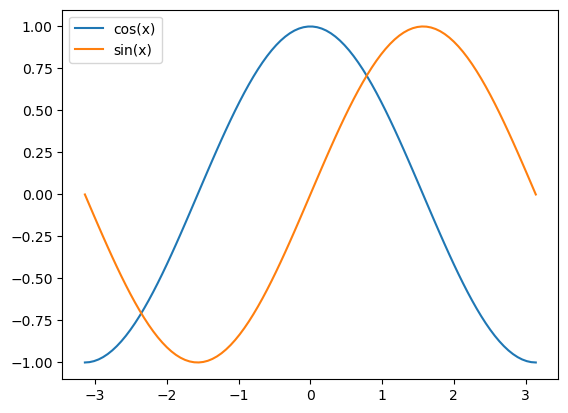

In [5]:
# pyplot
plt.plot(x, cos_x, label = 'cos(x)')
plt.plot(x, sin_x, label = 'sin(x)')
plt.legend()


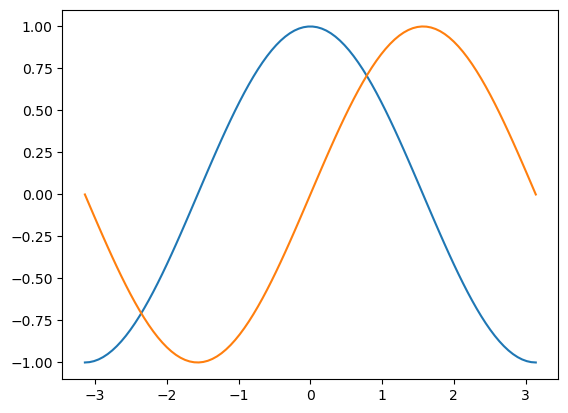

In [7]:
# OO interface 
fig, ax = plt.subplots(nrows = 1, ncols = 1)    # fig = figure, ax = axis, this line asks the interface to create a figure with an axis 
ax.plot(x, cos_x, label = 'cosx')
ax.plot(x, sin_x, label = 'sinx')

### OO Interface

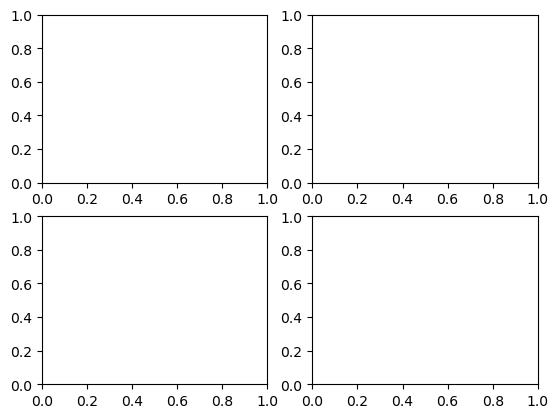

In [10]:
fig, ax = plt.subplots(nrows = 2, ncols = 2)  # the number of rows and columns is for the number of axes per row and column 

# 3 What is OO ax, really?

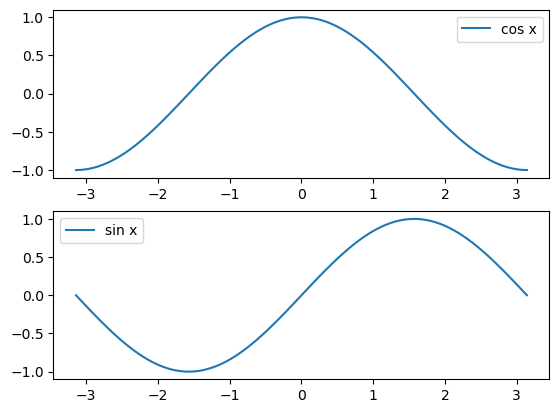

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x, cos_x, label='cos x')      # must specify which axis 
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

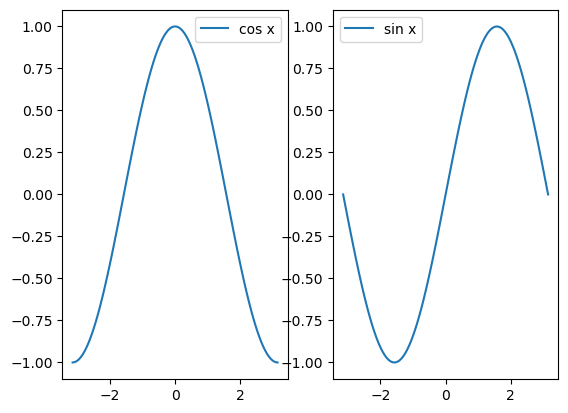

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2)       

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

In [15]:
type(ax)     # hence, ax is a numpy array 

numpy.ndarray

In [16]:
ax.shape   # the 2 shows that there are 2 subplots. the comma shows that there it is a one dimensional array 

(2,)

In [17]:
type(ax[0])

matplotlib.axes._axes.Axes

# 4 A complete OO example

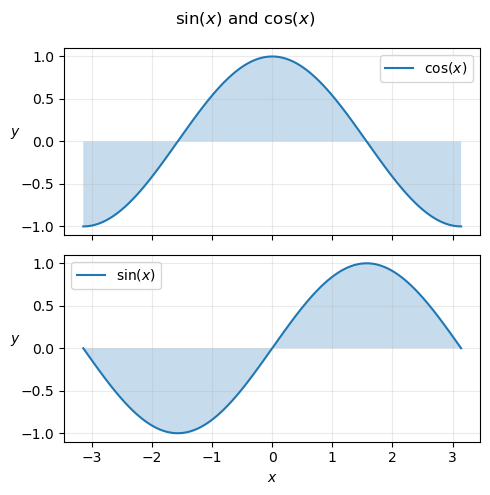

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5),
                       sharex=True)          # share the same X axis, otherwise will have its own axis 
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)   # colour the specified area 
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:                                 # using a for loop for the legend 
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')
fig.tight_layout()                           # ensures that the graphs fit in the area without overlapping etc 

Text(0.5, 0.98, '$\\sin(x)$ and $\\cos(x)$')

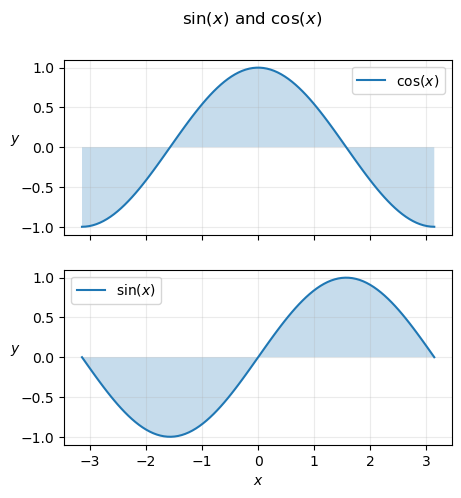

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5),
                       sharex=True)         
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)  
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:                                
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')

# 5 Multiple rows and columns

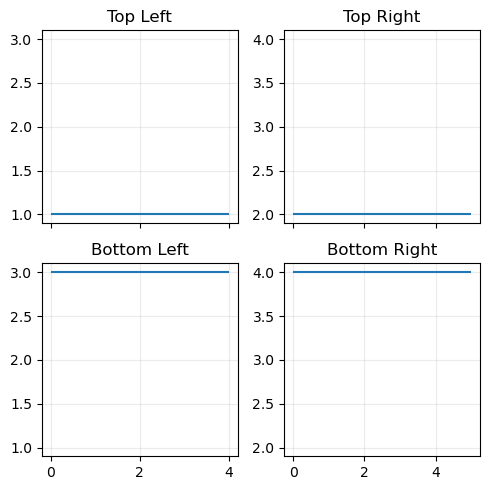

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# naming each of the axes for easier identification
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

# horizonal lines 
top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

# for loop, only write it once. for all the elements on ax.flatten, have grid with 25% opacity 
for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

### Using ax

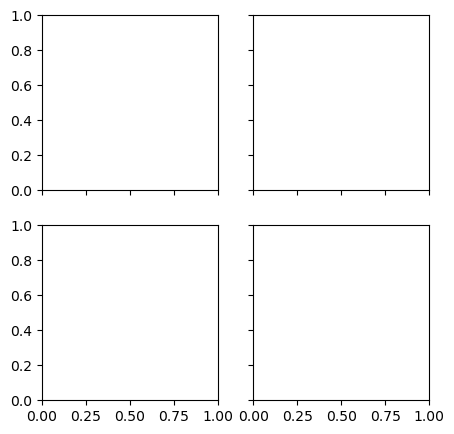

In [22]:
# creating a figure 
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='row')

# since the ax is arranged in a 2x2 array, instead of naming each quadrant, can do it like this.. 
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

## 5.1 Sharing axes

In [24]:
# can make it all the same (via true), only columns the same (via col) and only rows the same (vis row)

## 5.2 Accessing all axes

In [25]:
# use a for loop to type less 

# 6 Other useful plots

## 6.1 Histograms

### Data

### A quick helper function

In [26]:
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows = 1)

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows = 1)

    return data 

### The histogram

In [27]:
plt.style.use('bmh')     # style of the plot. bmh is a more modern lookimg plot 
data = get_plot_data()   # retrieve data from prev cell 

plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

FileNotFoundError: sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv not found.

## 6.2 Scatter plots

In [28]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()

FileNotFoundError: sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv not found.

## 6.3 Bar charts

Text(0, 0.5, 'Number of Students')

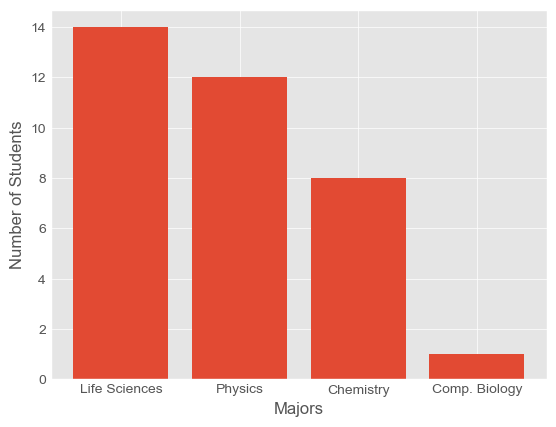

In [29]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## 6.4 Pie charts

Text(0.5, 1.0, 'Percentage of each major')

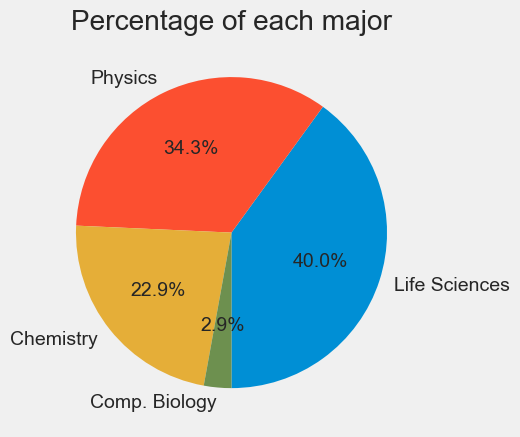

In [30]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')